<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="360" height="160" /></center>

# <center>**Quora Question Pair Similarity**</center>

## **Table of Contents**

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Dataset](#section301)<br>
  - 3.2 [Pandas pre-profiling](#section302)<br>
  
  
4. [Data Exploration](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
  - 4.2 [Exploratory Data Analysis](#section402)<br>
  

5. [Data Preprocessing](#section5)<br> 
  - 5.1 [Preprocessing of text](#section501)<br>
  - 5.2 [Pandas post-profiling](#section502)<br>

6. [Making Data ready for model](#section6)<br> 
  - 6.1 [Tokenisation,Sequencing and Padding](#section601)<br>

7. [Model Building and Evaluation](#section7)<br>

   

8. [Conclusion](#section8)<br>

<a name=section1></a>

---
# **1. Problem Statement**

---

- **Quora** is a place to **gain and share knowledge**—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.

<br> 
<center><img src="https://cdn.vox-cdn.com/thumbor/5OmlB8UmMcdhILy4E-ttm5GKDuU=/0x0:640x417/1220x813/filters:focal(269x158:371x260):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/47707895/quoralogo.0.jpg" width="700px" height="450px"/></center>
<br>  

- Over **100 million people** visit Quora every month, so it's no surprise that many people ask **similarly worded questions**. Multiple questions with the same intent can cause seekers to spend **more time finding** the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.

### **Scenario**

- Identify which questions asked on Quora are **duplicates of questions** that have already been asked. 
- This could be useful to instantly provide answers to questions that have already been answered. 
- We are tasked with predicting whether **a pair of questions are duplicates or not**. 

<a name=section2></a>

---
# **2. Importing Libraries**
---

In [ ]:
# data visualisation and manipulation
# Basic import numpy, pandas and matplotlib 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
from pandas_profiling import ProfileReport
%matplotlib inline

# basic preprocessing libraries
import re
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from nltk.stem.wordnet import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# importing different layers for tensorflow-keras
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Activation, Flatten



# importing train test split
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a name=section3></a>

---
# **3. Loading Data**
---

In [ ]:
train_data = pd.read_csv("/content/train.csv")
print('the shape of train data',train_data.shape)
train_data.head()

the shape of train data (404290, 6)


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


**Observation:**
- Our data has **404290** rows and **6** columns


<a name=section301></a>


### 3.1 Description of the Dataset


In [ ]:
train_data.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


<a name=section302></a>


### 3.2 Pandas pre-profiling


In [ ]:
# Making Pre-profiling report for data
profile = ProfileReport(train_data, title='Pre-Profiling Report for train data', minimal=True)
profile.to_file(output_file='Pre_Profiling_Report_train.html')
print('Accomplished!')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observation**
- There are **4 numeric** and **2 categorical features**  in the trained data.
- There are **3 missing cells** in the data.



<a name=section4></a>
## 4. Data Exploration

<a name=section401></a>
### 4.1 Data Preprocessing

In [ ]:
# crosschecking the number of missing values in train_data:
train_data.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
#Checking whether there are any rows with null values
nan_rows = train_data[train_data.isnull().any(1)]
print (nan_rows)

            id  ...  is_duplicate
105780  105780  ...             0
201841  201841  ...             0
363362  363362  ...             0

[3 rows x 6 columns]


In [ ]:
# Filling the null values with ' '
train_data = train_data.fillna('')
nan_rows = train_data[train_data.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


<a name=section402></a>
### 4.2 Exploratory Data Analysis

- Distribution of data points among output classes
  - Number of duplicate(smilar) and non-duplicate(non similar) questions

<AxesSubplot:xlabel='is_duplicate'>

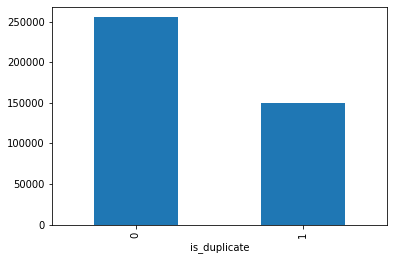

In [ ]:
train_data.groupby("is_duplicate")['id'].count().plot.bar()

In [ ]:
print('~> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(train_data['is_duplicate'].mean()*100, 2)))
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(train_data['is_duplicate'].mean()*100, 2)))

~> Question pairs are not Similar (is_duplicate = 0):
   63.08%

~> Question pairs are Similar (is_duplicate = 1):
   36.92%


**Observation:**
- There are **63% of question pairs** that are not similar
- There are **37% of question pairs** that are  similar.

#### Number of Unique Questions

In [ ]:
# number of unique questions
qids = pd.Series(train_data['qid1'].tolist() + train_data['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



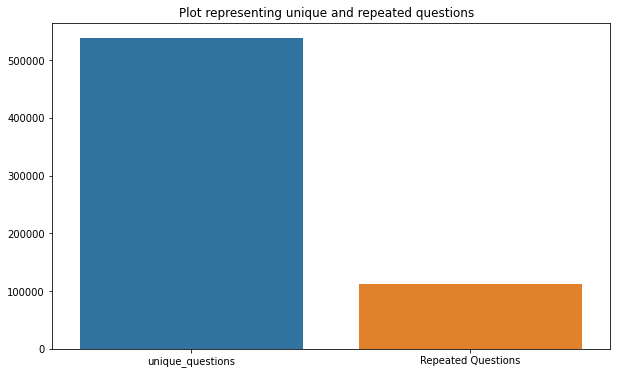

In [ ]:
x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

**Observation:**
- As we can from the above plot there is **huge difference** between unique and repeated questions

In [ ]:
#checking whether there are any repeated pair of questions

pair_duplicates = train_data[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions =",(pair_duplicates).shape[0] - train_data.shape[0])

Number of duplicate questions = 0


###### Number of occurences of each questions

Maximum number of times a single question is repeated: 157



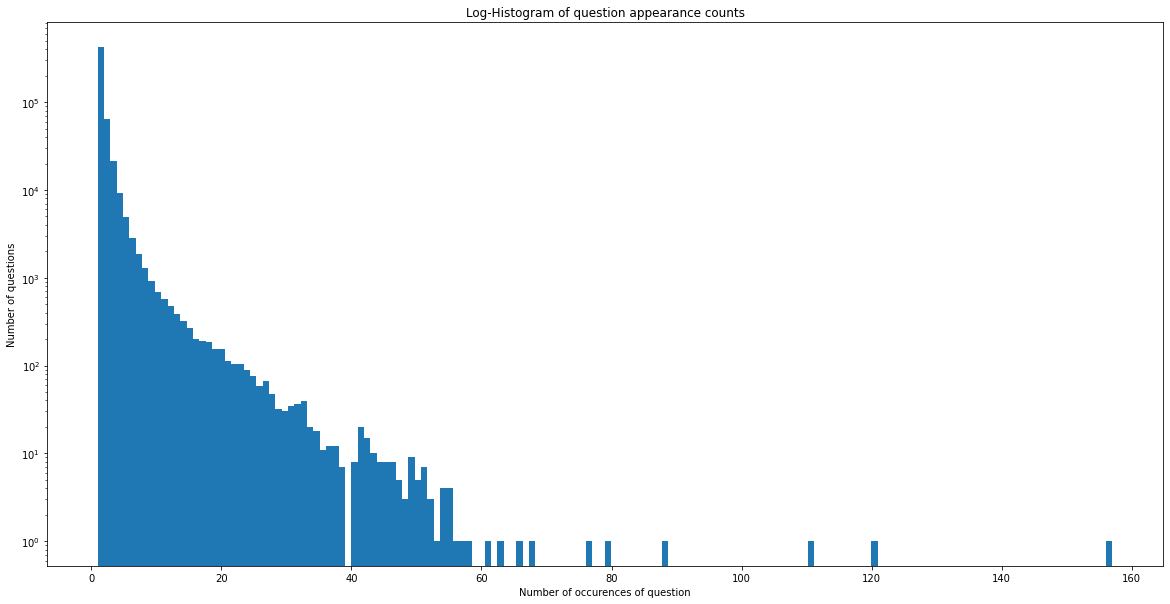

In [ ]:
plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

In [ ]:
# dropping columns
train_data = train_data.drop(['id','qid1','qid2'],axis=1)
train_data.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


<a name=section5></a>
## 5. Data Preprocessing

<a name=section501></a>
### 5.1 Preprocessing of text

In [ ]:
# preprocessing of text


STOPWORDS = set(stopwords.words('english')) # getting stopwords of english


def preprocess(x):
    x = str(x).lower() # making alphabets lowercase
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\ # the replacing short form words to their full words
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will") 
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)  # performing stemming
        example1 = BeautifulSoup(x) # removing html tags
        x = example1.get_text()
               
    
    return x
    

In [ ]:
#appying preprocessing to our text data
train_data['q1'] = train_data['question1'].apply(preprocess)
train_data['q2'] = train_data['question2'].apply(preprocess)

In [ ]:
train_data.head()

,question1,question2,is_duplicate,q1,q2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolve in water quikly sugar salt...,which fish would survive in salt water


In [ ]:
train_data = train_data.drop(['question1','question2'],axis=1) # dropping unprocessed columns
train_data.head()

,is_duplicate,q1,q2
0,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,0,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...
2,0,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,0,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...
4,0,which one dissolve in water quikly sugar salt...,which fish would survive in salt water


**Observation**
- We removed unecessary columns from our data.
- We got the preprocessed text data.

<a name=section502></a>


### 5.2 Pandas post-profiling


In [ ]:
# Making Post-profiling report for data
profile = ProfileReport(train_data, title='Post-Profiling Report for train data', minimal=True)
profile.to_file(output_file='Post_Profiling_Report_train.html')
print('Accomplished!')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


 **Observation** 
- Our data has **403797** rows and **3** columns
- Now we have **0% missing cells**

<a name=section6></a>
## 6. Making data ready for model

In [ ]:
y = train_data['is_duplicate'].values
X = train_data.drop(['is_duplicate'], axis=1)
X.head() 

,q1,q2
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...
4,which one dissolve in water quikly sugar salt...,which fish would survive in salt water


In [ ]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

<a name=section601></a>


### 6.1 Tokenisation, Sequencing and Padding

In [ ]:
#Tokenisation for q1
np.random.seed(101)

q1_train = X_train['q1']
q1_test = X_test['q1']


t = Tokenizer(filters='!"#$%&()*+,-/:;<=>?@[\\]^`{|}~\t\n', oov_token="<OOV>")
t.fit_on_texts(q1_train)


In [ ]:
#Sequencing for q1
sequencing_q1_train= t.texts_to_sequences(q1_train)
sequencing_q1_test= t.texts_to_sequences(q1_test)

In [ ]:
#getting max sequence size
max_length_padding=[]
for i in sequencing_q1_train:
    max_length_padding.append(len(i))
print("Maximum sequence length Padding size-",max(max_length_padding))


In [ ]:
# here I chose the max sequence length as my padding= 82
padded_q1_train = pad_sequences(sequencing_q1_train, maxlen=82, padding='post')
padded_q1_test = pad_sequences(sequencing_q1_test, maxlen=82, padding='post')

In [ ]:
# getting glove vector beacause we will using these embeddings
embeddings_index = {}
f = open('/content/glove.6B.300d.txt',encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
# create a weight matrix for words 
embedding_matrix = np.zeros((len(t.word_index) + 1, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
# words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
vocab_size=len(t.word_index) + 1
print(vocab_size)


58608


In [ ]:
#Tokenisation for q2
np.random.seed(101)

q2_train = X_train['q2']
q2_test = X_test['q2']

t = Tokenizer(filters='!"#$%&()*+,-/:;<=>?@[\\]^`{|}~\t\n', oov_token="<OOV>")
t.fit_on_texts(q2_train)

In [ ]:
#Sequencing 
sequencing_q2_train= t.texts_to_sequences(q2_train)
sequencing_q2_test= t.texts_to_sequences(q2_test)

In [ ]:
#getting max sequence size
max_length_padding=[]
for i in sequencing_q2_train:
    max_length_padding.append(len(i))
print("Maximum sequence length Padding size-",max(max_length_padding))

Maximum sequence length Padding size- 248


In [ ]:
# here I chose the max sequence length as my padding= 248
padded_q2_train = pad_sequences(sequencing_q2_train, maxlen=248, padding='post')
padded_q2_test = pad_sequences(sequencing_q2_test, maxlen=248, padding='post')

<a name=section7></a>

---
# **7. Model Building and Evaluation**

---

- Using **functional API** for model building. It is different from sequential API.
-The sequential API allows you to create models **layer-by-layer** for most problems. 
- It is limited in that it does not allow you to create models that share layers or have **multiple inputs**.
- The functional API specifically allows you to define **multiple input** or output models as well as models that **share layers**.

In [ ]:

tf.random.set_seed(2)
tf.keras.backend.clear_session()

# For taking input in functional API, we have to define our input layer
input_1 = Input(shape=(82,),name='q1') # creating our input layer and taking 1st input of shape (82,)
embedding_q1 = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=82, trainable=False)(input_1) # getting embeddings for question1 from matrix
Lstm_layer1=LSTM((100))(embedding_q1) # creating LSTM layer with 100 units
flatten_1= Flatten()(Lstm_layer1) 

input_2 = Input(shape=(248,),name='q2') # # creating our 2nd input layer and taking 2st input of shape (248,)
embedding_q2 = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=248, trainable=False)(input_2)  #getting embeddings for question2
Lstm_layer2=LSTM((100))(embedding_q2) # creating LSTM layer with 100 units
flatten_2=Flatten()(Lstm_layer2)


#concate layer 
concate_layer= concatenate([flatten_1,flatten_2],axis=1)

#dense layer
dense_layer_1= Dense(units=128, activation='relu',kernel_initializer='he_normal',name='layer1')(concate_layer)


#Batch normalisation
BN_layer_1 = tf.keras.layers.BatchNormalization()(dense_layer_1)


#dense layer
dense_layer_2= Dense(units=16,activation='relu',kernel_initializer='he_normal',name='layer3')(BN_layer_1 )

#output
output = Dense(units=2, activation= 'softmax',kernel_initializer='glorot_uniform',name='output')(dense_layer_2)

#model
model = Model(inputs=[input_1,input_2 ], outputs=output )


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 q1 (InputLayer)                [(None, 128)]        0           []                               
                                                                                                  
 q2 (InputLayer)                [(None, 248)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 128, 300)     16923300    ['q1[0][0]']                     
                                                                                                  
 embedding_1 (Embedding)        (None, 248, 300)     16923300    ['q2[0][0]']                     
                                                                                              

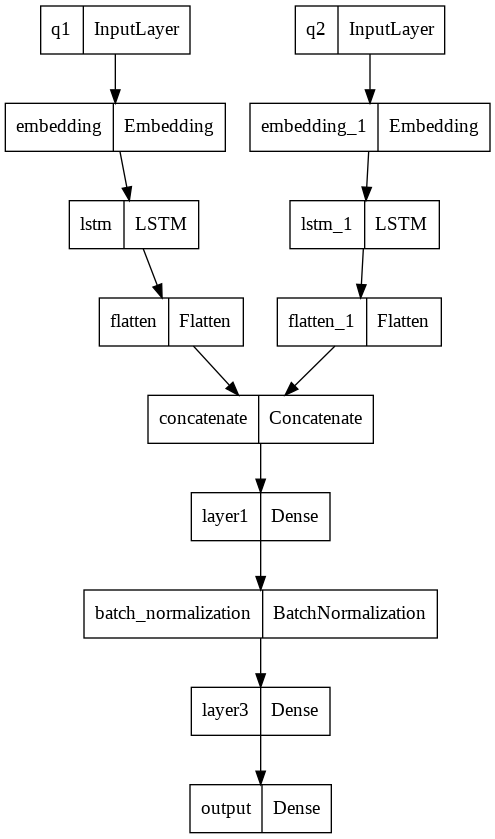

In [ ]:
tf.keras.utils.plot_model(model,'model.png')

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [ ]:
# encoding y labels
Y = y_train     
Y=tf.keras.utils.to_categorical(Y, num_classes=2)
Y_val= y_test   
Y_val=tf.keras.utils.to_categorical(Y_val, num_classes=2)

In [ ]:
# train ,validation inputs to our model
X_tr= { 'q1':padded_q1_train, 'q2':padded_q2_train }
X_val = { 'q1': padded_q1_test, 'q2': padded_q2_test}

In [ ]:
history = model.fit( X_tr, Y, batch_size=2048,epochs=15,validation_data=(X_val,Y_val) ) # training our model and getting validation accuracy

Epoch 1/15
139/139 [==============================] - 102s 706ms/step - loss: 0.5996 - accuracy: 0.6757 - val_loss: 0.6516 - val_accuracy: 0.6308
Epoch 2/15
139/139 [==============================] - 97s 696ms/step - loss: 0.5429 - accuracy: 0.7271 - val_loss: 0.5928 - val_accuracy: 0.6692
Epoch 3/15
139/139 [==============================] - 97s 695ms/step - loss: 0.5260 - accuracy: 0.7386 - val_loss: 0.5669 - val_accuracy: 0.7361
Epoch 4/15
139/139 [==============================] - 97s 695ms/step - loss: 0.5166 - accuracy: 0.7449 - val_loss: 0.5581 - val_accuracy: 0.7281
Epoch 5/15
139/139 [==============================] - 97s 696ms/step - loss: 0.5064 - accuracy: 0.7526 - val_loss: 0.5814 - val_accuracy: 0.6942
Epoch 6/15
139/139 [==============================] - 96s 694ms/step - loss: 0.4987 - accuracy: 0.7575 - val_loss: 0.5403 - val_accuracy: 0.7320
Epoch 7/15
139/139 [==============================] - 97s 696ms/step - loss: 0.4910 - accuracy: 0.7630 - val_loss: 0.5345 - val_a

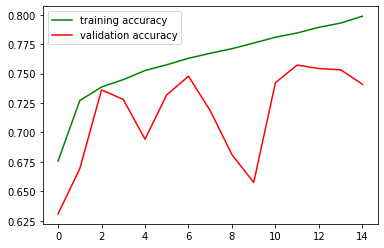

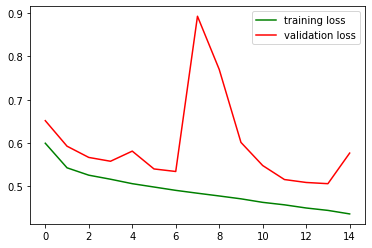

In [ ]:
# showing plots for accuracy and loss
accuracy = history.history["accuracy"]
loss = history.history["loss"]

val_accuracy = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

#plot 
plt.plot(accuracy,'g',label='training accuracy')
plt.plot(val_accuracy, 'r', label='validation accuracy')
plt.legend()
plt.show()


plt.plot(loss,'g',label='training loss')
plt.plot(val_loss, 'r', label='validation loss')
plt.legend()
plt.show()

**Observation :**
- For accuracy,  as the no epochs increases, **the train accuracy also increased** . The validation accuracy also increased but  for middle epochs we saw a dip but eventually it also increased **upto 75%**

- For loss, as the no of epochs increased, the **train loss also decreased** but with validation loss we saw ascent for middle epoch but then it also decreased.

In [ ]:
# showing our loss and accuracy in a dataframe
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.599607,0.675668,0.651645,0.630801,0
1,0.542937,0.727095,0.592794,0.669223,1
2,0.525967,0.738596,0.566891,0.736113,2
3,0.516644,0.744879,0.558080,0.728075,3
4,0.506380,0.752614,0.581420,0.694238,4
5,0.498672,0.757497,0.540345,0.731958,5
6,0.490979,0.762995,0.534482,0.747755,6
7,0.484384,0.767282,0.892412,0.718494,7
8,0.478043,0.771151,0.769828,0.681145,8
9,0.471443,0.775925,0.601542,0.657474,9


In [ ]:
# predicting our test data with our model
y_pred = model.predict([padded_q1_test, padded_q2_test])

In [ ]:
y_pred # predicted probablities by model

array([[0.9860482 , 0.01395177],
       [0.971046  , 0.02895397],
       [0.64095396, 0.359046  ],
       ...,
       [0.9890631 , 0.01093696],
       [0.9178951 , 0.08210494],
       [0.99022573, 0.00977434]], dtype=float32)

- Top 30 values showing that question pairs are **duplicate: 1** or **non- duplicate: 0** 

In [ ]:
np.argmax(y_pred[:30], axis=-1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0])

<a name=section8></a>

---
# **8. Conclusion**
---

- We analyzed and understood that the textual data need preprocessing.

- **Extensive and thorough preprocessing** is required for the data.

- Getting max length for padding improved the metric

- We used **Batch normalisation** with dense layers to get the good accuracy.

- The LSTM network gave us the **train acc of 80% and test acc of 75%**

- This model helps in differentiating between **duplicates** and **non- duplicates** pair of questions

- The model will ease the process of finding answers on Quora even if question pairs are duplicates.

**Applications**

- It will remove the **ambiguity** among questions for users.
- It will help users to get answer quickly than before.
- Build better exprience for users on Quora.